In [46]:
import feedparser
import pandas as pd
import numpy as np

ENGLISH_RSS = "https://voxeurop.eu/en/feed/rss/all.xml"
ITALIAN_RSS = "https://voxeurop.eu/it/feed/rss/all.xml"

en_feed = feedparser.parse(ENGLISH_RSS)
it_feed = feedparser.parse(ITALIAN_RSS)

In [8]:
en_pairs = [(row['title'], int(row['id'].split("/")[1])) for row in en_feed['entries']]
it_pairs = [(row['title'], int(row['id'].split("/")[1])) for row in it_feed['entries']]

In [16]:
columns = ['text', 'id']

en = pd.DataFrame(en_pairs, columns=columns)
it = pd.DataFrame(it_pairs, columns=columns)

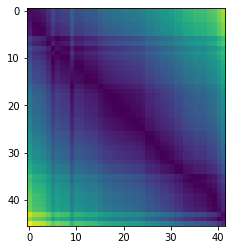

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

piecewise_differences = [abs(val - it['id'].values) for val in en['id'].values]

plt.imshow(piecewise_differences)

In [54]:
piecewise_df = pd.DataFrame(piecewise_differences)
piecewise_df.index = en['text']
piecewise_df.columns = it['text']

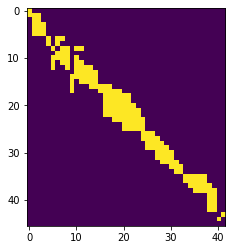

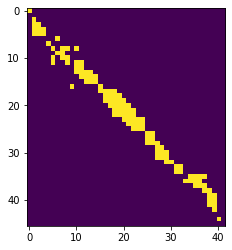

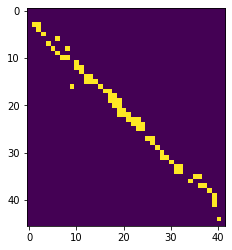

In [60]:
thresholds = [15, 10, 5]

for threshold in thresholds:
    plt.figure()
    plt.imshow(piecewise_df < threshold)

In [76]:
(piecewise_df < 5)[:5][piecewise_df.columns[:5]]

text,COVID-19 : L’impegno e il potere dei cittadini in tempi di crisi,Jean-Dominique Giuliani (Fondation Schuman): “L’Europa sarà democratica o non sarà affatto”,Iniziativa Citizens Take Over Europe: “Vogliamo un’Europa che protegga e da proteggere”,Covid-19 e mobilità: Il virus apre una nuova frattura in Europa,Libertà dell'informazione in Europa: La situazione è “profondamente insoddisfacente”
text,,,,,
COVID-19 : We foster citizen empowerment in time of crisis,False,False,False,False,False
Culture at the time of coronavirus: For a European cultural renaissance,False,False,False,False,False
Jean-Dominique Giuliani (Schuman Foundation): ‘Europe will be democratic or not at all’,False,False,False,False,False
After the Covid-19 crisis: What kind of post-corona world do Europeans want?,False,True,True,False,False
Citizens Take Over Europe initiative: ‘We want a Europe that cares and is taken care of’,False,False,True,False,False


Clearly there's no threshold for the id proximity that will match the cross-language phrases well enough